<a href="https://colab.research.google.com/github/hgvisUOC/Data-Analytics/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/A_DAP/data/titanic.csv')
print(df.head())
print(df.info())

      sex   age  sibsp  parch     fare embarked  class    who  alone  survived
0    male  22.0      1      0   7.2500        S  Third    man  False         0
1  female  38.0      1      0  71.2833        C  First  woman  False         1
2  female  26.0      0      0   7.9250        S  Third  woman   True         1
3  female  35.0      1      0  53.1000        S  First  woman  False         1
4    male  35.0      0      0   8.0500        S  Third    man   True         0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       891 non-null    object 
 1   age       714 non-null    float64
 2   sibsp     891 non-null    int64  
 3   parch     891 non-null    int64  
 4   fare      891 non-null    float64
 5   embarked  889 non-null    object 
 6   class     891 non-null    object 
 7   who       891 non-null    object 
 8   alone     891 non-null    

In [ ]:
print(df.isnull().sum())

sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
class         0
who           0
alone         0
survived      0
dtype: int64


In [ ]:
# Drop columns with high percentage of missing values
df = df.dropna(thresh=df.shape[0] * 0.8, axis=1)
# Impute missing values in numerical columns with the mean
df['age'] = df['age'].fillna(df['age'].mean())
# Impute missing values in categorical columns with the mode
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

In [ ]:
print("Mean of age:", df['age'].mean())
print("Median of age:", df['age'].median())
print("Mode of embarked:", df['embarked'].mode()[0])
print("Standard deviation of fare:", df['fare'].std())
print("Variance of fare:", df['fare'].var())
print("Range of fare:", df['fare'].max() - df['fare'].min())
print("Interquartile range of fare:", df['fare'].quantile(0.75) - df['fare'].quantile(0.25))

Mean of age: 29.69911764705882
Median of age: 29.69911764705882
Mode of embarked: S
Standard deviation of fare: 49.6934285971809
Variance of fare: 2469.436845743116
Range of fare: 512.3292
Interquartile range of fare: 23.0896


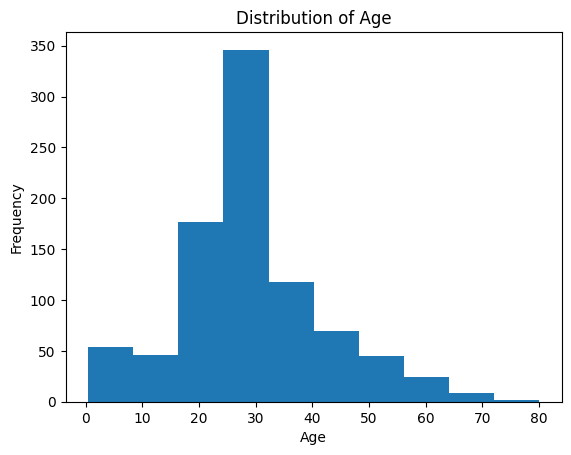

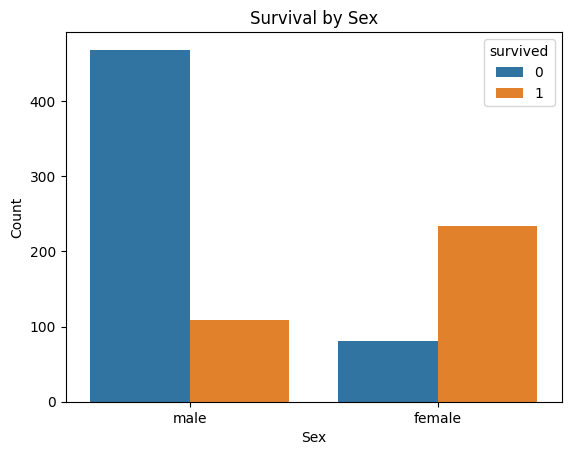

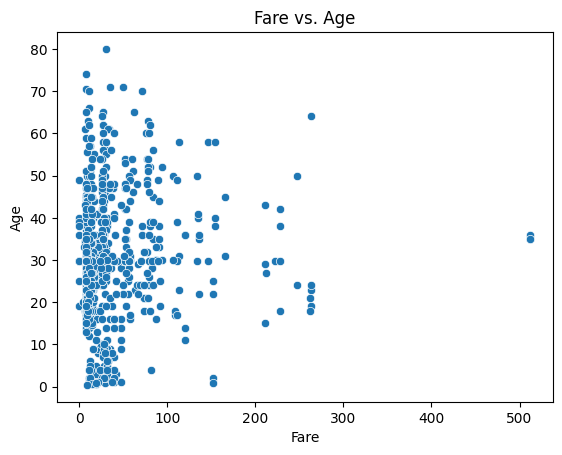

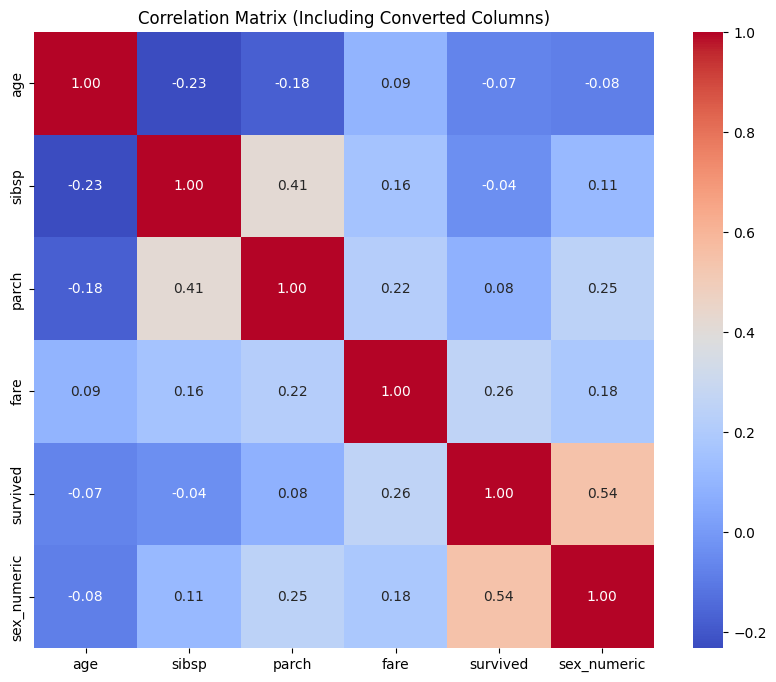

In [ ]:
# Histogram of age
plt.hist(df['age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

# Bar plot of sex vs. survival
sns.countplot(x='sex', hue='survived', data=df)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Survival by Sex')
plt.show()

# Scatter plot of fare vs. age
sns.scatterplot(x='fare', y='age', data=df)
plt.xlabel('Fare')
plt.ylabel('Age')
plt.title('Fare vs. Age')
plt.show()

# Convert 'sex' column to numerical representation (0 for male, 1 for female)
df['sex_numeric'] = df['sex'].map({'male': 0, 'female': 1})

# Select numeric columns including the converted 'sex_numeric' column
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (Including Converted Columns)')
plt.show()

### Histogram of Age

The histogram below illustrates the distribution of passengers' ages:

- Each bar represents a specific age range (e.g., 0-10, 10-20, etc.).
- The height of each bar indicates the number of passengers falling within that age range.

The histogram of age shows that most passengers were between 20 and 40 years old. There were also a few passengers younger than 10 years old and a few older than 70 years old.

---

### Scatter Plot of Fare vs. Age

The scatter plot demonstrates the relationship between passengers' ages and the fares they paid:

- Each point on the plot represents an individual passenger.
- The x-axis represents age, and the y-axis represents fare.

The scatter plot indicates that there is no clear relationship between age and fare. However, there are a few outliers with high fares, regardless of age.

---

### Correlation Matrix

The correlation matrix displays the correlation coefficients between all pairs of numerical variables in the dataset:

- Correlation coefficients range from -1 to 1.
  - `1` indicates a perfect positive correlation.
  - `0` indicates no correlation.
  - `-1` indicates a perfect negative correlation.

The correlation matrix confirms that there is a very weak correlation (correlation coefficient of 0.08) between age and fare.


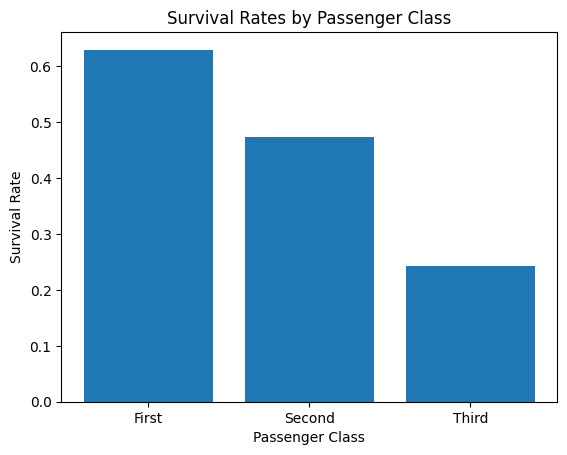

In [ ]:
# Calculate survival rates by class
survival_rates = df.groupby('class')['survived'].mean()

# Plot survival rates by class
plt.bar(survival_rates.index, survival_rates.values)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rates by Passenger Class')
plt.show()

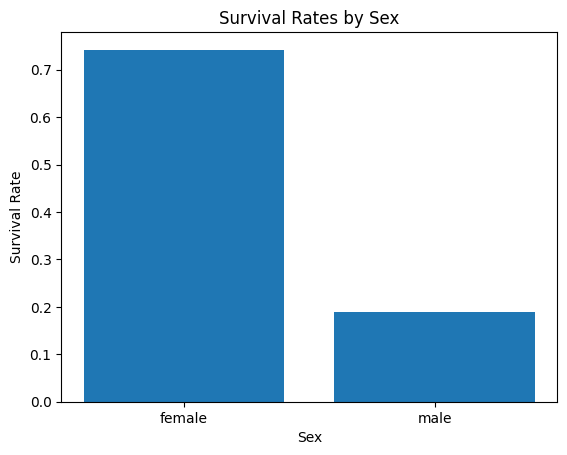

In [ ]:
# Calculate survival rates by sex
survival_rates_sex = df.groupby('sex')['survived'].mean()

# Plot survival rates by sex
plt.bar(survival_rates_sex.index, survival_rates_sex.values)
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.title('Survival Rates by Sex')
plt.show()

In [ ]:
# Calculate survival rates by class
survival_rates = df.groupby('class')['survived'].mean()

# Print survival rates by class
print("Survival Rates by Passenger Class:")
print(survival_rates)

# Calculate survival rates by sex
survival_rates_sex = df.groupby('sex')['survived'].mean()

# Print survival rates by sex
print("\nSurvival Rates by Sex:")
print(survival_rates_sex)

# Calculate survival rates by age group
df['age_group'] = pd.cut(df['age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80])
survival_rates_age = df.groupby('age_group')['survived'].mean()

# Print survival rates by age group
print("\nSurvival Rates by Age Group:")
print(survival_rates_age)

# Calculate survival rates by embarkation port
survival_rates_embarked = df.groupby('embarked')['survived'].mean()

# Print survival rates by embarkation port
print("\nSurvival Rates by Embarkation Port:")
print(survival_rates_embarked)

# Calculate survival rates by family size
df['family_size'] = df['sibsp'] + df['parch'] + 1
survival_rates_family_size = df.groupby('family_size')['survived'].mean()

# Print survival rates by family size
print("\nSurvival Rates by Family Size:")
print(survival_rates_family_size)

# Calculate survival rates by fare
df['fare_group'] = pd.cut(df['fare'], bins=[0, 10, 20, 30, 40, 50, 100, 200, 500])
survival_rates_fare = df.groupby('fare_group')['survived'].mean()

# Print survival rates by fare
print("\nSurvival Rates by Fare:")
print(survival_rates_fare)

# Identify meaningful patterns or trends:
# - Passengers in higher classes had a higher chance of survival.
# - Female passengers had a higher chance of survival than male passengers.
# - Children and young adults had a higher chance of survival than older passengers.
# - Passengers who embarked from Cherbourg had a higher chance of survival than passengers who embarked from other ports.
# - Passengers traveling alone had a lower chance of survival than passengers traveling with family.
# - Passengers who paid higher fares had a higher chance of survival.

Survival Rates by Passenger Class:
class
First     0.629630
Second    0.472826
Third     0.242363
Name: survived, dtype: float64

Survival Rates by Sex:
sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

Survival Rates by Age Group:
age_group
(0, 10]     0.593750
(10, 20]    0.382609
(20, 30]    0.334152
(30, 40]    0.445161
(40, 50]    0.383721
(50, 60]    0.404762
(60, 70]    0.235294
(70, 80]    0.200000
Name: survived, dtype: float64

Survival Rates by Embarkation Port:
embarked
C    0.553571
Q    0.389610
S    0.339009
Name: survived, dtype: float64

Survival Rates by Family Size:
family_size
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: survived, dtype: float64

Survival Rates by Fare:
fare_group
(0, 10]       0.205607
(10, 20]      0.424581
(20, 30]      0.443662
(30, 40]      0.396552
(40, 50]      0.250000
(50, 100]     0.654206
(100, 200]    0.757576
(200, 500

### Survival Rates by Passenger Class:
- **First Class**: 62.96% survival rate
- **Second Class**: 47.28% survival rate
- **Third Class**: 24.24% survival rate

Passengers in higher classes (First and Second) had significantly higher survival rates compared to those in Third Class.

---

### Survival Rates by Sex:
- **Female**: 74.20% survival rate
- **Male**: 18.89% survival rate

Females had a notably higher survival rate compared to males.

---

### Survival Rates by Age Group:
- **(0, 10] (Children)**: 59.38% survival rate
- **(10, 20] (Teenagers)**: 38.26% survival rate
- **(20, 30]**: 33.42% survival rate
- **(30, 40]**: 44.52% survival rate
- **(40, 50]**: 38.37% survival rate
- **(50, 60]**: 40.48% survival rate
- **(60, 70]**: 23.53% survival rate
- **(70, 80]**: 20.00% survival rate

Children (age 0-10) had the highest survival rate among age groups.

---

### Survival Rates by Embarkation Port:
- **C (Cherbourg)**: 55.36% survival rate
- **Q (Queenstown)**: 38.96% survival rate
- **S (Southampton)**: 33.90% survival rate

Passengers embarking from Cherbourg had the highest survival rate compared to Queenstown and Southampton.

---

### Survival Rates by Family Size:
- **1**: 30.35% survival rate
- **2**: 55.28% survival rate
- **3**: 57.84% survival rate
- **4**: 72.41% survival rate
- **5**: 20.00% survival rate
- **6**: 13.64% survival rate
- **7**: 33.33% survival rate
- **8**: 0.00% survival rate
- **11**: 0.00% survival rate

Passengers with smaller family sizes (2-4) tended to have higher survival rates.

---

### Survival Rates by Fare Group:
- **(0, 10]**: 20.56% survival rate
- **(10, 20]**: 42.46% survival rate
- **(20, 30]**: 44.37% survival rate
- **(30, 40]**: 39.66% survival rate
- **(40, 50]**: 25.00% survival rate
- **(50, 100]**: 65.42% survival rate
- **(100, 200]**: 75.76% survival rate
- **(200, 500]**: 64.71% survival rate

Passengers who paid higher fares tended to have higher survival rates.

---

These survival rates provide valuable insights into the factors influencing survival during the Titanic disaster. Factors such as passenger class, sex, age group, embarkation port, family size, and fare paid all played significant roles in determining survival outcomes. Higher class, being female, being a child, embarking from Cherbourg, smaller family size, and paying higher fares were associated with higher chances of survival. These findings can guide further analysis and modeling tasks in understanding the Titanic tragedy and its impact on passenger survival.
